In [358]:
import numpy as np
import pandas as pd
from geopy.distance import vincenty

In [359]:
data = pd.read_csv('K-4/june2_thursday/up_data')

In [360]:
data.shape

(11122, 8)

In [361]:
#df = df[df['SPEED_KMPH']<=5]

In [362]:
#Town_Hall = pd.DataFrame()

In [363]:
df = pd.DataFrame()

In [364]:
'''
{
    "busstop": "Town Hall",
    "latlons": [
      "12.96393155",
      "77.58425661"
    ]
}
{
    "busstop": "Trinity Circle,HALASURU,BESIDE M.G.ROAD & A STAR CENTER",
    "latlons": [
      "12.9728141986",
      "77.6204735879"
    ]
}
{
    "busstop": "Tippasandra Market,THIPPASANDRA,BESIDE VINAYAKA MEDICALS",
    "latlons": [
      "12.9725489952",
      "77.6510896627"
    ]
} 
'''

'\n{\n    "busstop": "Town Hall",\n    "latlons": [\n      "12.96393155",\n      "77.58425661"\n    ]\n}\n{\n    "busstop": "Trinity Circle,HALASURU,BESIDE M.G.ROAD & A STAR CENTER",\n    "latlons": [\n      "12.9728141986",\n      "77.6204735879"\n    ]\n}\n{\n    "busstop": "Tippasandra Market,THIPPASANDRA,BESIDE VINAYAKA MEDICALS",\n    "latlons": [\n      "12.9725489952",\n      "77.6510896627"\n    ]\n} \n'

In [365]:
#df.to_csv('K_4/speed_less_5')

In [366]:
s_lat = 12.9725489952
s_long = 77.6510896627
bus_stop = "Tippasandra_Market"

In [367]:
for index,line in data.iterrows():
    dist = vincenty((s_lat,s_long),(line['lat'],line['long'])).meters
    if dist < 100:
        line['b_distance']=dist
        df= df.append(line)        
    else:
        continue


In [368]:
df.columns

Index(['Unnamed: 0', 'b_distance', 'date_time', 'device_id', 'distance', 'lat',
       'long', 'speed', 'up-down'],
      dtype='object')

In [369]:
df = df[['device_id','date_time','speed','b_distance']]

In [370]:
df['real_time'] = df['date_time']

In [371]:
df.shape

(63, 5)

In [372]:
df = df[['device_id','date_time','real_time','speed','b_distance']]

In [373]:
#Town_Hall['date_time'] = Town_Hall['date_time'].astype('str').map(lambda x : x.split()[1] + " "+ x.split()[2])

In [374]:
df['date_time'] = df['date_time'].astype('str').map(lambda x : x.split()[1])

In [375]:
df['date_time']

556      08:22:36
557      08:22:48
558      08:22:56
559      08:23:06
560      08:23:16
561      08:25:03
2088     06:25:22
2089     06:25:33
2090     06:25:42
2091     06:25:52
2832     10:12:22
2833     10:12:31
2834     10:12:41
2835     10:12:52
2836     10:13:02
2837     10:13:12
3485     07:37:49
3486     07:37:59
3487     07:38:09
3488     07:40:01
4220     11:20:10
4221     11:20:20
4222     11:20:30
4223     11:20:40
4224     11:20:50
4225     11:20:59
5094     09:54:13
5095     09:54:19
5096     09:54:25
5097     09:54:31
           ...   
5964     09:48:16
5965     09:48:26
5966     09:48:36
5967     09:48:46
6575     07:47:59
6576     07:48:12
6577     07:48:20
6578     07:48:33
9053     10:57:28
9054     10:57:38
9055     10:57:49
9056     10:58:02
9057     10:59:53
9702     14:46:35
9703     14:46:45
9704     14:46:55
9705     14:47:06
9706     14:47:15
9707     14:47:25
9708     14:47:35
10450    09:39:55
10451    09:40:14
10452    09:41:55
10453    09:42:00
10454    0

In [376]:
#Trinity_Circle.head(100)

In [377]:
'''
def get_hour_min(x):
    from datetime import datetime
    date_obj = datetime.strptime(x, '%I:%M:%S %p')
    
    #date = date_obj.strftime("%H:%M")
    return date_obj.hour * 60 +date_obj.minute
'''

'\ndef get_hour_min(x):\n    from datetime import datetime\n    date_obj = datetime.strptime(x, \'%I:%M:%S %p\')\n    \n    #date = date_obj.strftime("%H:%M")\n    return date_obj.hour * 60 +date_obj.minute\n'

In [378]:
def get_hour_min(x):
    from datetime import datetime
    date_obj = datetime.strptime(x, '%H:%M:%S')
    
    #date = date_obj.strftime("%H:%M")
    return date_obj.hour * 60 +date_obj.minute

In [379]:
df['date_time'] = df['date_time'].map(lambda x : get_hour_min(x))

In [380]:
df = df.sort_values(by = 'date_time')

In [381]:
df

,device_id,date_time,real_time,speed,b_distance
2088,150811705.0,385,2016-06-02 06:25:22,26.0,52.811540
2089,150811705.0,385,2016-06-02 06:25:33,0.0,20.908999
2090,150811705.0,385,2016-06-02 06:25:42,9.0,14.433170
2091,150811705.0,385,2016-06-02 06:25:52,19.0,34.298844
3486,150811496.0,457,2016-06-02 07:37:59,13.0,17.466273
3485,150811496.0,457,2016-06-02 07:37:49,10.0,65.940379
3487,150811496.0,458,2016-06-02 07:38:09,0.0,13.071176
3488,150811496.0,460,2016-06-02 07:40:01,20.0,47.671602
6575,150810425.0,467,2016-06-02 07:47:59,15.0,47.974515
6577,150810425.0,468,2016-06-02 07:48:20,0.0,9.815265


In [382]:
devices = df['device_id'].unique()

In [383]:
devices

array([  1.50811705e+08,   1.50811496e+08,   1.50810425e+08,
         1.50221241e+08,   1.50810849e+08,   1.50221473e+08,
         1.50218048e+08,   1.50218772e+08])

In [384]:
d_mapping = {}
i =1
for d in devices:
    d_mapping[d] = i
    i= i+1
    

In [385]:
d_mapping

{150218048.0: 7,
 150218772.0: 8,
 150221241.0: 4,
 150221473.0: 6,
 150810425.0: 3,
 150810849.0: 5,
 150811496.0: 2,
 150811705.0: 1}

In [386]:
df.replace({'device_id': d_mapping} , inplace=True)

In [387]:
#Town_Hall = Town_Hall.drop_duplicates(subset=['DEVICE_ID', 'IST_DATE'])

In [388]:
df

,device_id,date_time,real_time,speed,b_distance
2088,1.0,385,2016-06-02 06:25:22,26.0,52.811540
2089,1.0,385,2016-06-02 06:25:33,0.0,20.908999
2090,1.0,385,2016-06-02 06:25:42,9.0,14.433170
2091,1.0,385,2016-06-02 06:25:52,19.0,34.298844
3486,2.0,457,2016-06-02 07:37:59,13.0,17.466273
3485,2.0,457,2016-06-02 07:37:49,10.0,65.940379
3487,2.0,458,2016-06-02 07:38:09,0.0,13.071176
3488,2.0,460,2016-06-02 07:40:01,20.0,47.671602
6575,3.0,467,2016-06-02 07:47:59,15.0,47.974515
6577,3.0,468,2016-06-02 07:48:20,0.0,9.815265


In [389]:
df.to_csv('K-4/june2_thursday/'+bus_stop);

In [390]:
#Trinity_Circle = Trinity_Circle.groupby(['DEVICE_ID','IST_DATE']).first()

In [391]:
import matplotlib.pyplot as plt
%matplotlib inline

([<matplotlib.axis.XTick at 0x7fe733390cc0>,
 <a list of 10 Text xticklabel objects>)

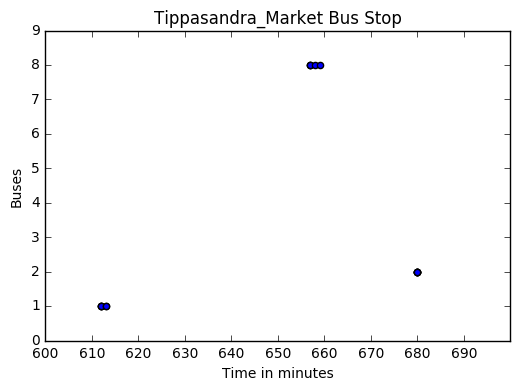

In [399]:
fig1 = plt.gcf()
plt.scatter(df['date_time'],df['device_id'])
plt.title(bus_stop+' Bus Stop')
plt.xlabel('Time in minutes')
plt.ylabel('Buses')
plt.xlim([500,600])
plt.xticks(range(500,600,10))

In [400]:
fig1.savefig('K-4/june2_thursday/'+bus_stop+' 600 to 700 minute.png',dpi=100)